# Project: Image Classification and Regression

**Author :** ACHER Clément 

Using TensorFlow backend.


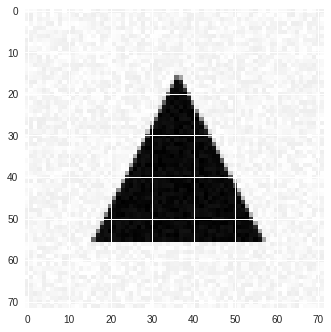

In [1]:
import mp1
from mp1 import IMAGE_SIZE
import keras
import numpy as np
from matplotlib import pyplot as plt

from keras import backend as K
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Input, UpSampling2D
from keras.optimizers import Adam, SGD

plt.rcParams["figure.figsize"] = (16,6)

# Simple Classification

In [2]:
# Train set
X_train, Y_train = mp1.generate_dataset_classification(300, 20) 

num_classes = 3

# Convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(Y_train, num_classes)

Creating data:
Done


In [0]:
def plot_history(history):
  """Helper function to plot the accuracy and loss"""
  f, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(history.history['acc'])
  ax1.plot(history.history['val_acc'])
  ax1.set_title('Model Accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')
  ax1.legend(['Train', 'Validation'], loc='upper left')

  # summarize history for loss
  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.set_title('Model Loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

The goal of this part is to create a linear classifier that can classify an image into one of the three possible categories (rectangle, disk, triangle).

## SGD

Let's build that linear classifier and use the SGD optimizer to train it.

In [4]:
batch_size = 32
epochs = 10

input_size = X_train.shape[1]

print(X_train.shape[0], 'train samples')

model = Sequential()
model.add(Dense(num_classes, input_shape=(input_size, ), activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)

300 train samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
Train on 240 samples, validate on 60 samples
Epoch 1/10
240/240 [==============================] - 1s 4ms/step - loss: 9.2877 - acc: 0.2833 - val_loss: 9.3091 - val_acc: 0.3833
Epoch 2/10
240/240 [==============================] - 0s 186us/step - loss: 8.9242 - acc: 0.3333 - val_loss: 7.4543 - val_acc: 0.3667
Epoch 3/10
240/240 [==============================] - 0s 179us/step - loss: 7.8197 - acc: 0.3833 - val_loss: 5.2842 - val_acc: 0.4833
Epoch 4/10
240/240 [==============================] - 0s 172us/step - loss: 7.7316 - acc: 0.3958 - val_loss: 7.4388 - val_acc: 0.3667
Epoch 5/10
240/240 [==============================] - 0s 190us/step -

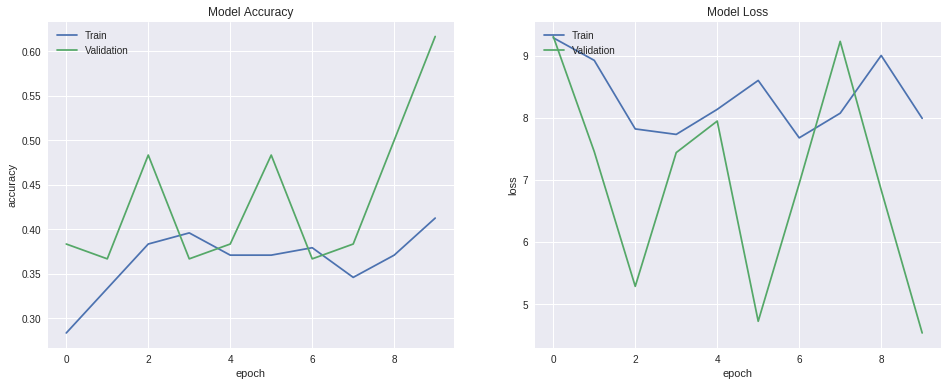

In [5]:
plot_history(history)

It doesn't look like we are going to be able to reach convergence using the the default parameters of the SGD.
We lower the learning rate, and use (Nesterov) momentum. 

In [6]:
epochs = 35
lr = 1e-3

sgd = SGD(lr=lr, momentum=0.9, nesterov=True)

SGD_model = Sequential()
SGD_model.add(Dense(num_classes, input_shape=(input_size, ), activation='softmax'))

SGD_model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

history = SGD_model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/35
240/240 [==============================] - 0s 651us/step - loss: 1.2609 - acc: 0.4708 - val_loss: 1.8204 - val_acc: 0.3667
Epoch 2/35
240/240 [==============================] - 0s 181us/step - loss: 0.9021 - acc: 0.5917 - val_loss: 0.9305 - val_acc: 0.5000
Epoch 3/35
240/240 [==============================] - 0s 175us/step - loss: 0.5849 - acc: 0.7500 - val_loss: 0.7823 - val_acc: 0.7000
Epoch 4/35
240/240 [==============================] - 0s 167us/step - loss: 0.4980 - acc: 0.8083 - val_loss: 0.5272 - val_acc: 0.7500
Epoch 5/35
240/240 [==============================] - 0s 172us/step - loss: 0.3863 - acc: 0.8750 - val_loss: 0.4709 - val_acc: 0.7333
Epoch 6/35
240/240 [==============================] - 0s 184us/step - loss: 0.3737 - acc: 0.8583 - val_loss: 0.3185 - val_acc: 0.9333
Epoch 7/35
240/240 [==============================] - 0s 182us/step - loss: 0.3277 - acc: 0.9000 - val_loss: 0.3146 - val_acc: 0.8833
Epoch 8/35
240/24

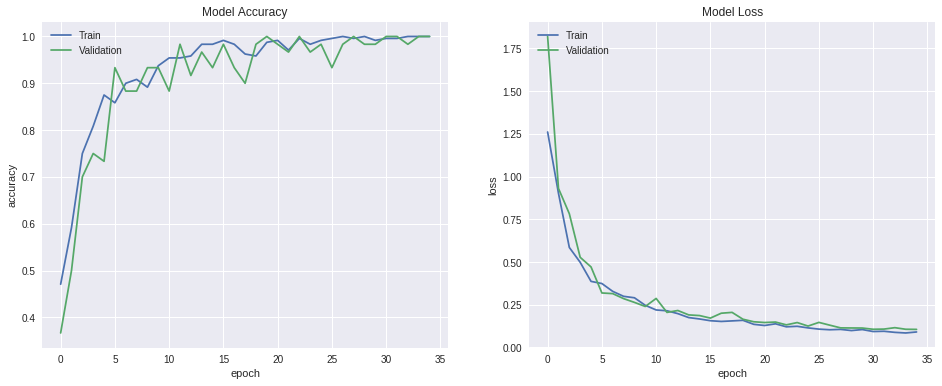

In [7]:
plot_history(history)

This time the model converges in about 30 epochs.

## Adam optimizer

Let's try to use Adam optimizer instead.

In [8]:
epochs = 30

adam = Adam(lr=0.001)

adam_model = Sequential()
adam_model.add(Dense(num_classes, input_shape=(input_size, ), activation='softmax'))

adam_model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = adam_model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/30
240/240 [==============================] - 0s 821us/step - loss: 1.6420 - acc: 0.4500 - val_loss: 0.7873 - val_acc: 0.5667
Epoch 2/30
240/240 [==============================] - 0s 203us/step - loss: 0.8961 - acc: 0.6417 - val_loss: 0.6523 - val_acc: 0.6833
Epoch 3/30
240/240 [==============================] - 0s 184us/step - loss: 0.4954 - acc: 0.7667 - val_loss: 0.5252 - val_acc: 0.7000
Epoch 4/30
240/240 [==============================] - 0s 193us/step - loss: 0.4389 - acc: 0.7958 - val_loss: 0.4278 - val_acc: 0.9167
Epoch 5/30
240/240 [==============================] - 0s 194us/step - loss: 0.3734 - acc: 0.8458 - val_loss: 0.3922 - val_acc: 0.7500
Epoch 6/30
240/240 [==============================] - 0s 197us/step - loss: 0.3142 - acc: 0.9250 - val_loss: 0.3336 - val_acc: 0.9000
Epoch 7/30
240/240 [==============================] - 0s 259us/step - loss: 0.2812 - acc: 0.9292 - val_loss: 0.3464 - val_acc: 0.8667
Epoch 8/30
240/24

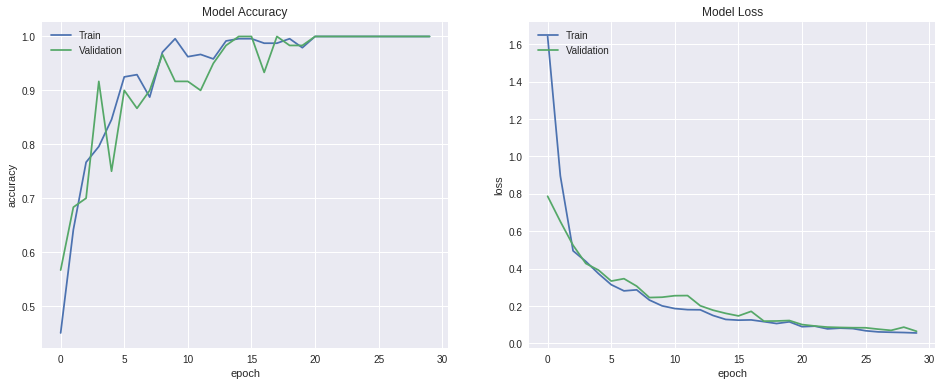

In [9]:
plot_history(history)

We achieve similar results using Adam optimizer.

# Visualization of the Solution




SGD



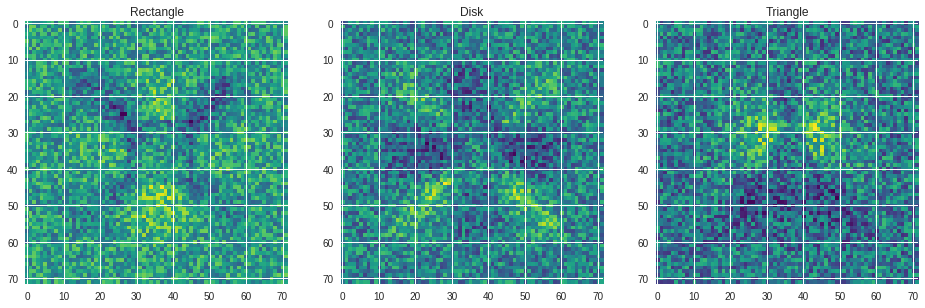

Adam



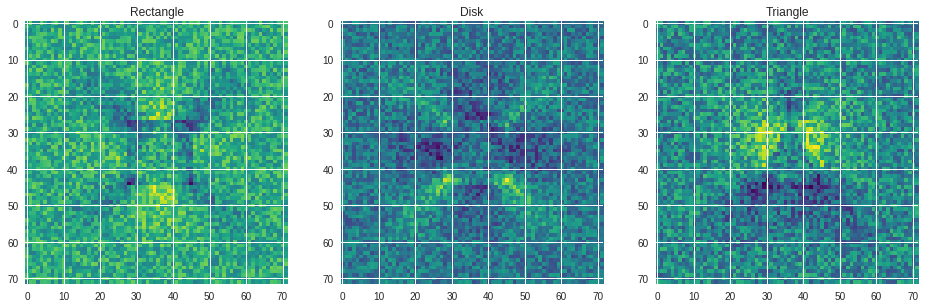

In [10]:
weights = model.get_weights()

shapes = ['Rectangle', 'Disk', 'Triangle']

print('SGD\n')
f, axs = plt.subplots(1, 3)
weights = SGD_model.get_weights()
for i in range(weights[0].shape[1]):
  axs[i].imshow(weights[0][:, i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='viridis')
  axs[i].set_title(shapes[i])

plt.show()

print('Adam\n')
f, axs = plt.subplots(1, 3)
weights = adam_model.get_weights()
for i in range(weights[0].shape[1]):
  axs[i].imshow(weights[0][:, i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='viridis')
  axs[i].set_title(shapes[i])


plt.show()


# A More Difficult Classification Problem

Let's take a more difficult problem. The goal is still to classify shapes, but this time the shapes can be anywhere in the grid, even troncated.

Creating data:
Done


A few examples



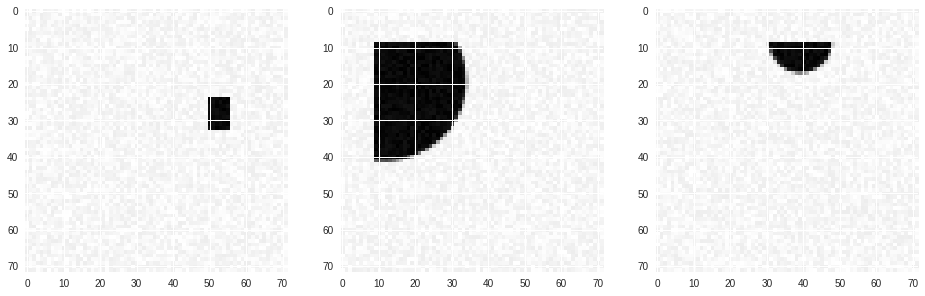

In [11]:
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20, True)

Y_train = keras.utils.to_categorical(Y_train, num_classes)

print('\n\nA few examples\n')
f, axs = plt.subplots(1, 3)
for i, ax in enumerate(axs):
  ax.imshow(X_train[i, :].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
plt.show()

We can try to use the previous linear model, but we can expect poor results as this task seems too complicated for a simple linear model.

In [12]:
epochs = 40

adam = Adam()

model = Sequential()
model.add(Dense(num_classes, input_shape=(input_size, ), activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/40
240/240 [==============================] - 0s 915us/step - loss: 2.4366 - acc: 0.3208 - val_loss: 2.1103 - val_acc: 0.3667
Epoch 2/40
240/240 [==============================] - 0s 208us/step - loss: 1.7390 - acc: 0.3708 - val_loss: 1.2239 - val_acc: 0.3667
Epoch 3/40
240/240 [==============================] - 0s 196us/step - loss: 1.4731 - acc: 0.3375 - val_loss: 1.3148 - val_acc: 0.3667
Epoch 4/40
240/240 [==============================] - 0s 196us/step - loss: 1.2708 - acc: 0.4042 - val_loss: 1.3725 - val_acc: 0.3167
Epoch 5/40
240/240 [==============================] - 0s 213us/step - loss: 1.0761 - acc: 0.4625 - val_loss: 1.1298 - val_acc: 0.3000
Epoch 6/40
240/240 [==============================] - 0s 208us/step - loss: 0.9991 - acc: 0.5167 - val_loss: 1.0512 - val_acc: 0.3333
Epoch 7/40
240/240 [==============================] - 0s 238us/step - loss: 0.9648 - acc: 0.5583 - val_loss: 1.1261 - val_acc: 0.3333
Epoch 8/40
240/24

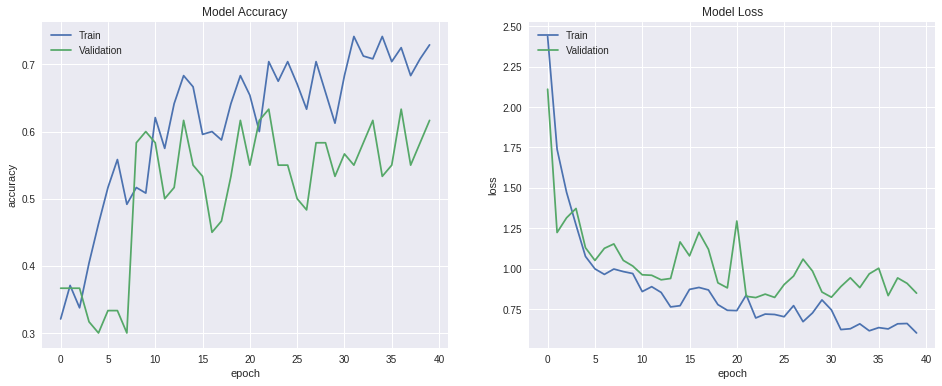

Creating data:
Done
300/300 [==============================] - 0s 88us/step


[0.8965513928731282, 0.6066666666666667]

In [13]:
plot_history(history)

[X_test, Y_test] = mp1.generate_test_set_classification()
model.evaluate(X_test, Y_test)

We get less than 60% accuracy on the testing set. Let's try a more complex model.

## Conv net

In [14]:
[X_train, Y_train] = mp1.generate_dataset_classification(1200, 20, True)

Y_train = keras.utils.to_categorical(Y_train, num_classes)

Creating data:
Done


In [15]:
X_train = X_train.reshape(-1, 1, IMAGE_SIZE, IMAGE_SIZE)

input_shape = (1, IMAGE_SIZE, IMAGE_SIZE)

epochs = 30

adam = Adam()

model = Sequential()
model.add(Conv2D(16, 5, input_shape=input_shape, data_format='channels_first', activation='relu'))
model.add(Conv2D(16, 5, data_format='channels_first', activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=0.2,
                    verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 68, 68)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 64, 64)        6416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 16, 64)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 16, 64)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               1048832   
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
__________

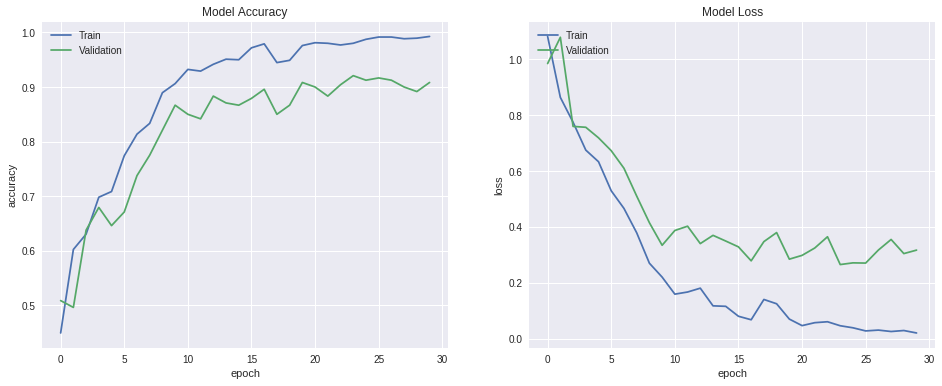

Creating data:
Done
300/300 [==============================] - 0s 347us/step


[0.4218688723444939, 0.89]

In [16]:
plot_history(history)

[X_test, Y_test] = mp1.generate_test_set_classification()
X_test = X_test.reshape(-1, 1, 72, 72)

model.evaluate(X_test, Y_test)

We train a model based on 2 convolutionnal layers, followed by a maxpool and densee layers. A dropout layer is also added, greatly reducing overfitting. Adam optimizer with default parameters led to the best results.

Using this model, we achieve an accuracy of 89% on the test set, with a loss of 0.42.

# A Regression Problem

We can tackle an even harder problem : detecting the position of the edges of a triangle. As this time we won't build a classifier, we change the loss function to the mean squared error.
We somehow need to normalize the edges that we want to predict. We sort them using the X coordinate of the edges as a key.

In [17]:
[X_train, Y_train] = mp1.generate_dataset_regression(1000, 20)

Creating data:
Done


In [0]:
def normalize_edge(edges):
  reshaped_edges = edges.reshape(3, 2)
  return reshaped_edges[np.argsort(reshaped_edges[:, 0]),].flatten()

In [0]:
Y_train = np.array([normalize_edge(edges) for edges in Y_train])

In [20]:
X_train = X_train.reshape(-1, 1, IMAGE_SIZE, IMAGE_SIZE)

input_shape = (1, IMAGE_SIZE, IMAGE_SIZE)

epochs = 100

adam = Adam()

model = Sequential()
model.add(Conv2D(32, 3, input_shape=input_shape, padding='same',
                 data_format='channels_first', 
                 activation='relu'))
model.add(Conv2D(32, 3, padding='same',
                 data_format='channels_first', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, 3, padding='same',
                 data_format='channels_first',
                 activation='relu'))
model.add(Conv2D(32, 3, padding='same',
                 data_format='channels_first', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Conv2D(32, 3, padding='same',
                 data_format='channels_first',
                 activation='relu'))
model.add(Conv2D(32, 3, padding='same',
                 data_format='channels_first', 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64))
model.add(Dense(6))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=adam)

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs, 
                    validation_split=0.2,
                    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 72, 72)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 72, 72)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 36, 72)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 36, 72)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 36, 72)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 9, 72)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 9, 72)         2336      
__________

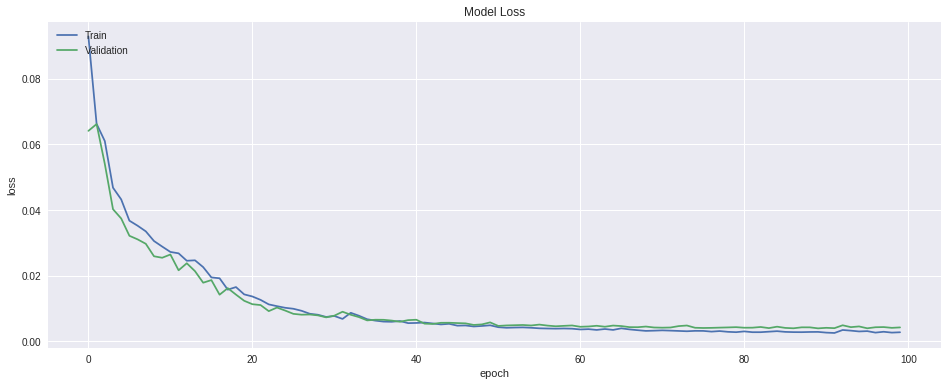

In [21]:
def plot_history_reg(history):
  """Helper function to plot the loss"""
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()
  
plot_history_reg(history)

In [22]:
[X_test, Y_test] = mp1.generate_test_set_regression()

X_test = X_test.reshape(-1, 1, IMAGE_SIZE, IMAGE_SIZE)
Y_test = np.array([normalize_edge(edges) for edges in Y_test])

Creating data:
Done


In [23]:

Y_predict = model.predict(X_test)

model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 420us/step


0.005773989992837111

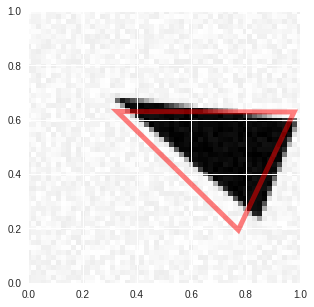

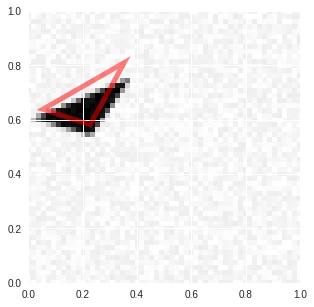

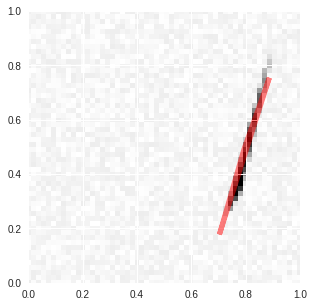

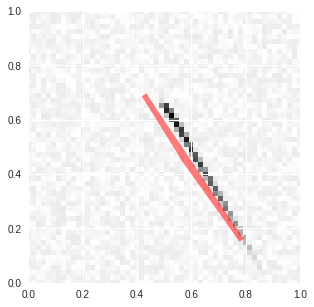

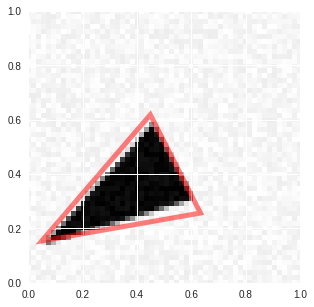

In [24]:
for i in range(10, 15):
  mp1.visualize_prediction(X_test[i], Y_predict[i])

Using a rather deep model, we obtain a loss of 0.0057 on testing set. Looking at a few results, the model is far from being perfect even though it gets the overall shape.

# Bonus : Image Denoising

We modify the functions generating the shapes in MP1 to return a noisy/clean dataset.

In [25]:
MAX_NOISE = 100

X_train, Y_train = mp1.generate_noisy_dataset(500, max_noise=MAX_NOISE)

X_train = X_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
Y_train = Y_train.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

Creating data:
Done


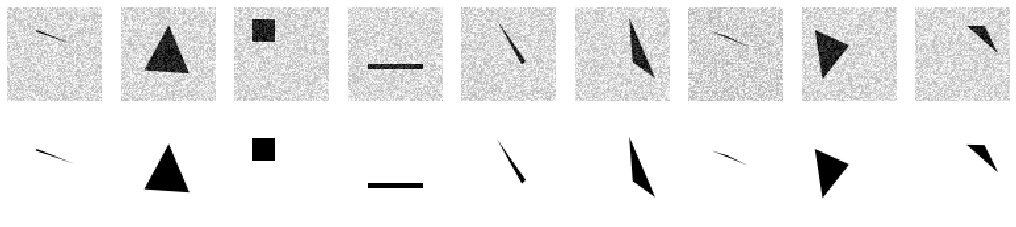

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display noisy image
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display image without the noise
    ax = plt.subplot(2, n, i + n)
    plt.imshow(Y_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

To denoise these images, we build an autoencoder taking as input the noisy image and that should output the denoised image.

In [27]:
input_img = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)

autoencoder.summary()

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X_train, Y_train,
                epochs=130,
                batch_size=128,
                validation_split=0.2,
                shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 72, 72, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 18, 18, 32)        9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 36, 36, 32)        0         
__________

In [28]:
X_test, _ = mp1.generate_noisy_dataset(100, max_noise=MAX_NOISE, fix_seed=True)
X_test = X_test.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

Creating data:
Done


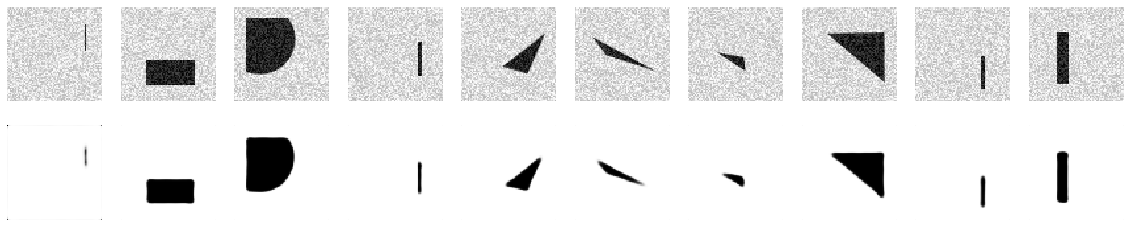

In [29]:
decoded_imgs = autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(IMAGE_SIZE, IMAGE_SIZE))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Results look pretty good!